In [27]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import hvplot.pandas


# Import API key
from config import geoapify_key

In [2]:
df =  pd.read_csv("Price/2018-2021 Housing Price.csv", encoding="UTF-8")


In [3]:
#Renaming columns for consistancy
df.rename(columns={'Sale2018' : 'Sales 2018',
                  'Average Price' : 'Average Price 2018',
                  'New Listings': 'New Listing 2018',
                  'Total New Listings 2021': 'New Listing 2021',
                  'Total New Listings 2020':'New Listing 2020'}, inplace=True)
df.columns


Index(['House', 'Municipality', 'Sales 2021', 'Dollar Volume 2021',
       'Average Price 2021', 'Median 2021', 'New Listing 2021',
       'Total Active Listings 2021', 'Sales 2020', 'Dollar Volume 2020',
       'Average Price 2020', 'Median Price 2020', 'New Listing 2020',
       'Total Active Listings 2020', 'Sales 2019', 'Dollar Volume 2019',
       'Average Price 2019', 'Median Price 2019', 'New Listing 2019',
       'Active Listing 2019', 'Sales 2018', 'Dollar Volume 2018',
       'Average Price 2018', 'Median Price', 'New Listing 2018',
       'Active Listings'],
      dtype='object')

In [4]:
df.head(5)

,House,Municipality,Sales 2021,Dollar Volume 2021,Average Price 2021,Median 2021,New Listing 2021,Total Active Listings 2021,Sales 2020,Dollar Volume 2020,...,Average Price 2019,Median Price 2019,New Listing 2019,Active Listing 2019,Sales 2018,Dollar Volume 2018,Average Price 2018,Median Price,New Listing 2018,Active Listings
0,Detached,Halton Region,5823,9159723655,1573025,1374250.5,7495,3942,5561,6959094187,...,1280300.788,936500.0,7958,11928,3819,4092862755,1.071711e+06,913125.0,6753,10757
1,Detached,Peel Region,11276,15591408578,1382707,1264500.0,15597,7917,9564,10561042731,...,1111765.603,880000.0,15228,18055,7215,6638950011,9.201594e+05,841250.0,11213,15363
2,Detached,City of Toronto,11534,19809440501,1717482,1392500.0,17284,12288,9709,14335511061,...,1501783.643,1036000.0,17972,22374,8098,10645883266,1.314631e+06,1005727.5,12053,16508
3,Detached,York Region,12572,20271320173,1612418,1440550.0,18435,14297,9902,12493394531,...,1309837.039,1050875.0,19919,34088,6471,7357297711,1.136965e+06,1037750.0,14958,27725
4,Detached,Durham Region,9900,10191540936,1029449,951000.0,12395,4961,8497,6643964933,...,768193.601,643000.0,13807,16879,6005,3932934116,6.549432e+05,626250.0,9387,12513


## Using pd.wide_to_long to for Supply and Demand to create Scatter Plot Graph

In [5]:
#Generating ID column in order to stack columns
ID = np.arange(0,25,1)


In [6]:
# Generating names all columns necessary to create a table for all supplies and average prices 
columns = ""
for x in range (2018, 2022):
    columns = columns + "'Average Price " + str(x) + "', "
    columns = columns + "'New Listing " + str(x) + "', "


new_df=df[['Average Price 2018','New Listing 2018', 'Average Price 2019', 'New Listing 2019', 
             'Average Price 2020', 'New Listing 2020', 'Average Price 2021', 'New Listing 2021']]

clean_df = new_df.copy()

clean_df['ID'] = ID
clean_df.head(5)



,Average Price 2018,New Listing 2018,Average Price 2019,New Listing 2019,Average Price 2020,New Listing 2020,Average Price 2021,New Listing 2021,ID
0,1.071711e+06,6753,1280300.788,7958,1.251411e+06,8245,1573025,7495,0
1,9.201594e+05,11213,1111765.603,15228,1.104250e+06,14446,1382707,15597,1
2,1.314631e+06,12053,1501783.643,17972,1.476518e+06,16661,1717482,17284,2
3,1.136965e+06,14958,1309837.039,19919,1.261704e+06,17329,1612418,18435,3
4,6.549432e+05,9387,768193.601,13807,7.819189e+05,11095,1029449,12395,4


In [7]:
#Merge/Stack all New Listing and Average Price column in 
stack = pd.wide_to_long(clean_df.reset_index(drop=True), 
               stubnames=['New Listing', 'Average Price'],
               i='ID',
               j = 'year',
                sep=" ")

stack.head(5)

,,New Listing,Average Price
ID,year,,
0,2018,6753,1.071711e+06
1,2018,11213,9.201594e+05
2,2018,12053,1.314631e+06
3,2018,14958,1.136965e+06
4,2018,9387,6.549432e+05


In [8]:
#Identify all max and min for each columns in order to generate scatter plot 
print(stack.min())
print(stack.max())

New Listing         559.0000
Average Price    391033.0507
dtype: float64
New Listing        33182.0
Average Price    1717482.0
dtype: float64


The correlation between both factors is 0.44
The r-value is: 0.2


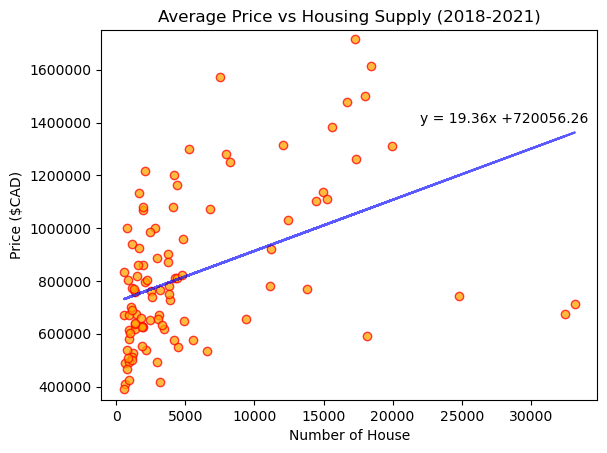

In [9]:
#Creating Scatter plot for price vs quanity 
x_axis=stack['New Listing']
y_axis = stack['Average Price']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values= slope*x_axis + intercept
line_eq_supply = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_axis, y_axis, edgecolors="red", facecolor="orange", alpha=0.75)
plt.plot(x_axis,regress_values,"b-", alpha = 0.65)
plt.annotate(line_eq_supply, (22000, 1400000), fontsize=10,color="black")

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {round(rvalue**2, 2)}")

plt.ticklabel_format(style='plain')
plt.ylim(350000, 1750000)
plt.title("Average Price vs Housing Supply (2018-2021)")
plt.xlabel("Number of House")
plt.ylabel("Price ($CAD)")

# Save the figure
plt.savefig("Graphs/Average_price_vs_supply.png")

plt.show()

In [10]:
# Generating names all columns necessary to create a table for all Demands and average prices 
columns_demand = ""
for x in range (2018, 2022):
    columns_demand = columns_demand + "'Average Price " + str(x) + "', "
    columns_demand = columns_demand + "'Sales " + str(x) + "', "

columns_demand

new_demand=df[['Average Price 2018', 'Sales 2018', 'Average Price 2019', 'Sales 2019', 
            'Average Price 2020', 'Sales 2020', 'Average Price 2021', 'Sales 2021']]

clean_demand_df = new_demand.copy()

clean_demand_df['ID'] = ID
clean_demand_df.head(5)


,Average Price 2018,Sales 2018,Average Price 2019,Sales 2019,Average Price 2020,Sales 2020,Average Price 2021,Sales 2021,ID
0,1.071711e+06,3819,1280300.788,3533,1.251411e+06,5561,1573025,5823,0
1,9.201594e+05,7215,1111765.603,7113,1.104250e+06,9564,1382707,11276,1
2,1.314631e+06,8098,1501783.643,8230,1.476518e+06,9709,1717482,11534,2
3,1.136965e+06,6471,1309837.039,7056,1.261704e+06,9902,1612418,12572,3
4,6.549432e+05,6005,768193.601,6376,7.819189e+05,8497,1029449,9900,4


In [11]:
#Merge/Stack all Sales and Average Price column in 
stack_demand = pd.wide_to_long(clean_demand_df.reset_index(drop=True), 
               stubnames=['Average Price', 'Sales'],
               i='ID',
               j = 'year',
                sep=" ")

stack_demand.head(5)

,,Average Price,Sales
ID,year,,
0,2018,1.071711e+06,3819
1,2018,9.201594e+05,7215
2,2018,1.314631e+06,8098
3,2018,1.136965e+06,6471
4,2018,6.549432e+05,6005


In [12]:
#Identify all max and min for each columns in order to generate scatter plot 
print(stack_demand.min())
print(stack_demand.max())

Average Price    391033.0507
Sales               358.0000
dtype: float64
Average Price    1717482.0
Sales              23170.0
dtype: float64


The correlation between both factors is 0.42
The r-value is: 0.17


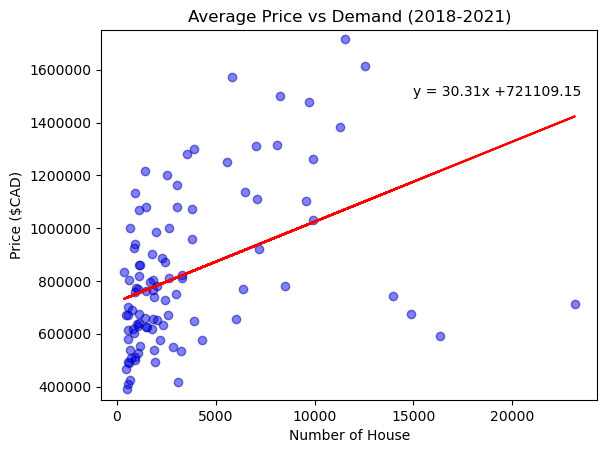

In [13]:
#Creating Scatter plot for price vs quanity 
x_axis=stack_demand['Sales']
y_axis = stack_demand['Average Price']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values= slope*x_axis + intercept
line_eq_demand = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_axis, y_axis, edgecolors="#00008B", facecolor="blue", alpha=0.5)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq_demand, (15000, 1500000), fontsize=10,color="black")


correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-value is: {round(rvalue**2,2)}")

plt.ticklabel_format(style='plain')
plt.ylim(350000, 1750000)
plt.title("Average Price vs Demand (2018-2021)")
plt.xlabel("Number of House")
plt.ylabel("Price ($CAD)")

# Save the figure
plt.savefig("Graphs/Average_price_vs_demand.png")

plt.show()

## Prepping variables for the reaminder of the Supply and Demand Graphs 

In [14]:
#Prepping Data sets to be used for ploting graphs 

supply_2021 = df.groupby(["Municipality"])['New Listing 2021'].sum()
supply_2020 = df.groupby(["Municipality"])['New Listing 2020'].sum()
supply_2019 = df.groupby(["Municipality"])['New Listing 2019'].sum()
supply_2018 = df.groupby(["Municipality"])['New Listing 2018'].sum()

demand_2021= df.groupby(["Municipality"])['Sales 2021'].sum()
demand_2020= df.groupby(["Municipality"])['Sales 2020'].sum()
demand_2019= df.groupby(["Municipality"])['Sales 2019'].sum()
demand_2018= df.groupby(["Municipality"])['Sales 2018'].sum()

price_2021 = (df.groupby(["Municipality"])['Dollar Volume 2021'].sum()/demand_2021)/1000
price_2020 = (df.groupby(["Municipality"])['Dollar Volume 2020'].sum()/demand_2020)/1000
price_2019 = (df.groupby(["Municipality"])['Dollar Volume 2019'].sum()/demand_2019)/1000
price_2018 = (df.groupby(["Municipality"])['Dollar Volume 2018'].sum()/demand_2018)/1000


year_price_2018 = round((df['Dollar Volume 2018'].sum()/df['Sales 2018'].sum())/1000)
year_price_2019 = round((df['Dollar Volume 2019'].sum()/df['Sales 2019'].sum())/1000)
year_price_2020 = round((df['Dollar Volume 2020'].sum()/df['Sales 2020'].sum())/1000)
year_price_2021 = round((df['Dollar Volume 2021'].sum()/df['Sales 2021'].sum())/1000)

year_price=[year_price_2018, year_price_2019, year_price_2020, year_price_2021]


## Price Related Graphs

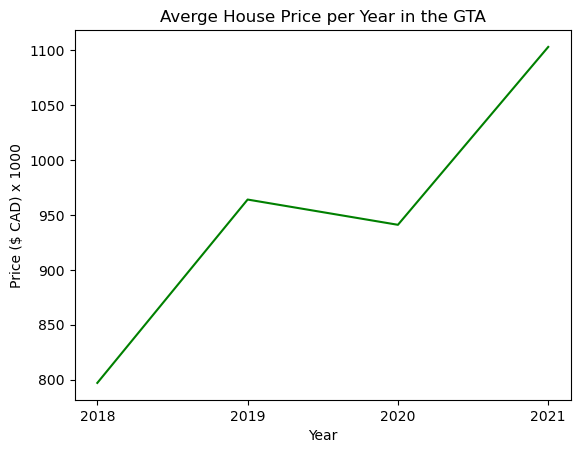

In [15]:
#Plot line graph to show housing price for each year in the GTA
x_axis = ['2018', '2019', '2020', '2021']
plt.plot(x_axis, year_price, color='g')
plt.title("Averge House Price per Year in the GTA")
plt.ylabel("Price ($ CAD) x 1000")
plt.xlabel("Year")

# Save the figure
plt.savefig("Graphs/Average_price_per_year.png")

plt.show()


In [16]:
#Creating DataFrame for Average House Price Per Municipality
Price_per_municipality = pd.DataFrame({"2018": price_2018,
                                        "2019": price_2019,
                                       "2020": price_2020,
                                        "2021": price_2021})

Price_per_municipality

,2018,2019,2020,2021
Municipality,,,,
City of Toronto,837.992084,1026.141438,990.953218,1058.643669
Durham Region,597.048230,706.499974,711.526850,927.748789
Halton Region,856.910598,1042.381476,1004.192717,1233.947575
Peel Region,713.960270,876.624906,878.243814,1053.179045
York Region,918.555190,1090.339870,1057.750110,1293.534096


In [17]:
#Creating Series for each Municipality 
PToronto = Price_per_municipality.loc['City of Toronto', ['2018', '2019', '2020', '2021']]
PDurham = Price_per_municipality.loc['Durham Region', ['2018', '2019', '2020', '2021']]
PHalton = Price_per_municipality.loc['Halton Region', ['2018', '2019', '2020', '2021']]
PPeel = Price_per_municipality.loc['Peel Region', ['2018', '2019', '2020', '2021']]
PYork = Price_per_municipality.loc['York Region', ['2018', '2019', '2020', '2021']]

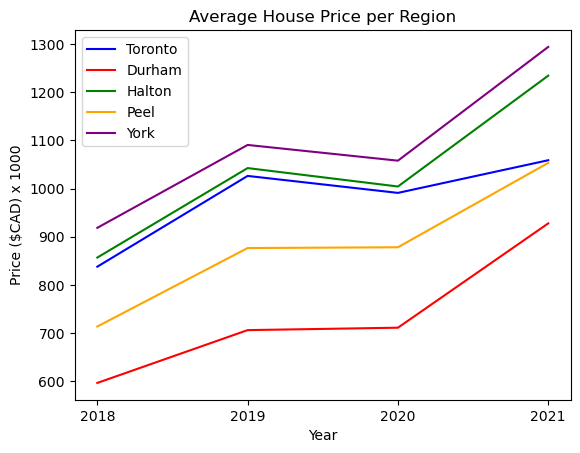

In [18]:
#Generate line graph for each Municipality 

x_axis=[2018, 2019, 2020, 2021]
plt.plot(x_axis, PToronto, color = 'b', label='Toronto')
plt.plot(x_axis, PDurham, color='r', label='Durham')
plt.plot(x_axis, PHalton, color='g', label='Halton')
plt.plot(x_axis, PPeel, color='orange', label='Peel')
plt.plot(x_axis, PYork, color='purple', label='York')

plt.title("Average House Price per Region")
plt.xlabel("Year")
plt.ylabel("Price ($CAD) x 1000")

plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.ticklabel_format(style='plain')
plt.legend(loc="best")

# Save the figure
plt.savefig("Graphs/Average_price_per_Region.png")

plt.show()

In [20]:
#Create DataFrame for 2021 Housing Price to use for GTA Map

num_price =  list(Price_per_municipality['2021'])
num_price= list(map(lambda x:x*40, num_price))
GTA_price_2021_df = pd.DataFrame({"Municipality": ["City of Toronto", 'Durham Region', 'Halton Region', 'Peel Region', 'York Region'],
                                  "Price_2021":num_price})
GTA_price_2021_df["Lat"]= ""
GTA_price_2021_df["Lon"]= ""
GTA_price_2021_df

,Municipality,Price_2021,Lat,Lon
0,City of Toronto,42345.747,,
1,Durham Region,37109.952,,
2,Halton Region,49357.903,,
3,Peel Region,42127.162,,
4,York Region,51741.364,,


In [21]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [22]:
# Print a message to find longitude and latitude search 
print("Starting Longitude and Latitude Search")

# Loop through the municipality DataFrame and search coordinates for each region
for index, row in GTA_price_2021_df.iterrows():
    # Get the region/city name & add ", Ontario" to the string so geoapify finds the correct region/city
    city = row["Municipality"] + ", Ontario"
    # Add the current region/city to the parameters
    
    params["text"] = f"{city}"
    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON

    response = response.json()
    
    # Extract latitude and longitude
    GTA_price_2021_df.loc[index, "Lat"] = response["results"][0]["lat"]
    GTA_price_2021_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {city} fetched...")

# Display sample data to confirm that the coordinates appear
GTA_price_2021_df

Starting Longitude and Latitude Search
Coordinates for City of Toronto, Ontario fetched...
Coordinates for Durham Region, Ontario fetched...
Coordinates for Halton Region, Ontario fetched...
Coordinates for Peel Region, Ontario fetched...
Coordinates for York Region, Ontario fetched...


,Municipality,Price_2021,Lat,Lon
0,City of Toronto,42345.747,43.653,-79.384
1,Durham Region,37109.952,44.031,-78.950
2,Halton Region,49357.903,43.504,-79.877
3,Peel Region,42127.162,43.746,-79.796
4,York Region,51741.364,44.001,-79.437


In [29]:
%%capture --no-display

# Configure the map plot
price_map = GTA_price_2021_df.hvplot.points(
"Lon",
"Lat",
geo=True,
tiles = "OSM",
frame_width = 700,
frame_height=600,
color = "Municipality",
alpha = 0.5,
size= 'Price_2021')


# Display the map
price_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Municipality,Price_2021)

# Demand Related Graphs

In [30]:
#Creating table for Demand for each region per year
Demand_per_municipality = pd.DataFrame({"2018": demand_2018,
                                        "2019": demand_2019,
                                        "2020": demand_2020,
                                        "2021": demand_2021     
                                       })
Demand_per_municipality 

,2018,2019,2020,2021
Municipality,,,,
City of Toronto,30009,27722,31166,43372
Durham Region,8716,9072,12417,14543
Halton Region,6986,6414,10019,10973
Peel Region,16238,15906,20288,24666
York Region,11688,12088,16433,22119


In [31]:
#Creating Demand Series per Municipality 
DToronto = Demand_per_municipality.loc['City of Toronto', ['2018', '2019', '2020', '2021']]
DDurham = Demand_per_municipality.loc['Durham Region', ['2018', '2019', '2020', '2021']]
DHalton = Demand_per_municipality.loc['Halton Region', ['2018', '2019', '2020', '2021']]
DPeel = Demand_per_municipality.loc['Peel Region', ['2018', '2019', '2020', '2021']]
DYork = Demand_per_municipality.loc['York Region', ['2018', '2019', '2020', '2021']]

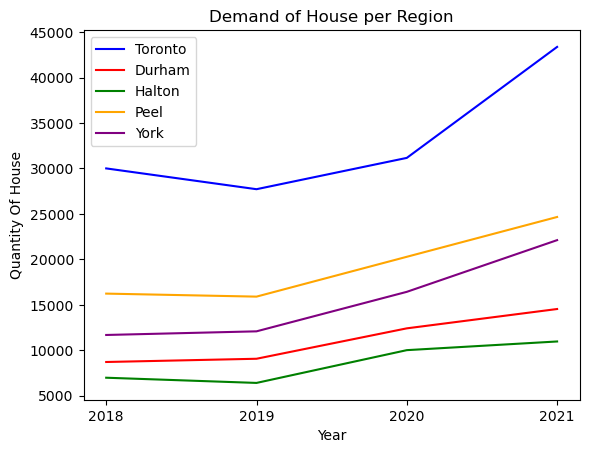

In [32]:
#Graphing Demand Series per Muncipality 

x_axis=[2018, 2019, 2020, 2021]
plt.plot(x_axis, DToronto, color = 'b', label='Toronto')
plt.plot(x_axis, DDurham, color='r', label='Durham')
plt.plot(x_axis, DHalton, color='g', label='Halton')
plt.plot(x_axis, DPeel, color='orange', label='Peel')
plt.plot(x_axis, DYork, color='purple', label='York')

plt.title("Demand of House per Region")
plt.xlabel("Year")
plt.ylabel("Quantity Of House")

plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.legend(loc="best")

# Save the figure
plt.savefig("Graphs/Demand_per_Region.png")

plt.show()

In [33]:
# Find the overall demand per year 
sum_column_demand = Demand_per_municipality.sum(axis=0)

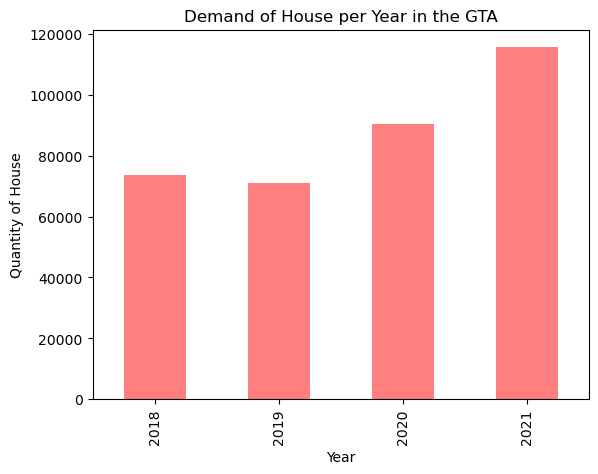

In [34]:
#Create Bar Graph for Housing Demand in the GTA Per Year
bar_demand = sum_column_demand.plot(kind="bar", color ='r', alpha = 0.5, title="Demand of House per Year in the GTA", width = 0.5, legend=False)
bar_demand.set_ylabel("Quantity of House")
bar_demand.set_xlabel("Year")

# Save the figure
plt.savefig("Graphs/Demand_per_year.png")

plt.show()

# Supply Related Graphs

In [35]:
#Generating DataFrame for Supply per year for every region 
Supply_per_municipality = pd.DataFrame({"2018": supply_2018,
                                        "2019": supply_2019,
                                       "2020": supply_2020,
                                        "2021": supply_2021     
                                       })
Supply_per_municipality


,2018,2019,2020,2021
Municipality,,,,
City of Toronto,36606,52377,59347,62585
Durham Region,12489,18331,16006,18037
Halton Region,10726,12753,14421,13831
Peel Region,21562,29444,31325,32733
York Region,23350,29852,28008,30941


In [36]:
#Creating Supply series per Region
Toronto = Supply_per_municipality.loc['City of Toronto', ['2018', '2019', '2020', '2021']]
Durham = Supply_per_municipality.loc['Durham Region', ['2018', '2019', '2020', '2021']]
Halton = Supply_per_municipality.loc['Halton Region', ['2018', '2019', '2020', '2021']]
Peel = Supply_per_municipality.loc['Peel Region', ['2018', '2019', '2020', '2021']]
York = Supply_per_municipality.loc['York Region', ['2018', '2019', '2020', '2021']]

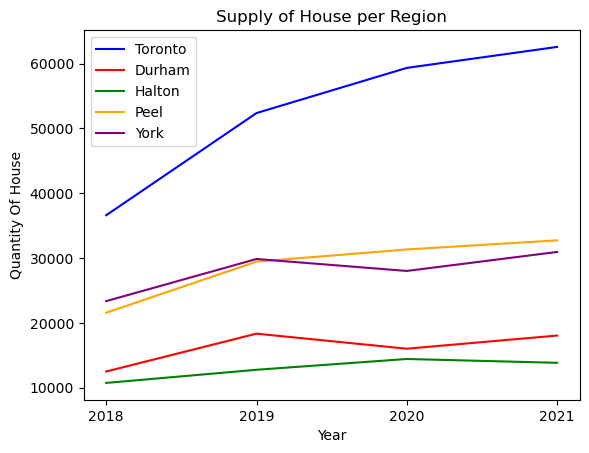

In [37]:
#Creating Supply Line graph to compare supply per year per region 
x_axis=[2018, 2019, 2020, 2021]
plt.plot(x_axis, Toronto, color = 'b', label='Toronto')
plt.plot(x_axis, Durham, color='r', label='Durham')
plt.plot(x_axis, Halton, color='g', label='Halton')
plt.plot(x_axis, Peel, color='orange', label='Peel')
plt.plot(x_axis, York, color='purple', label='York')

plt.title("Supply of House per Region")
plt.xlabel("Year")
plt.ylabel("Quantity Of House")

plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.legend(loc="best")

#Save the figure
plt.savefig("Graphs/Supply_per_region.png")

plt.show()

In [38]:
# Find the overall supply per year 
sum_column = Supply_per_municipality.sum(axis=0)


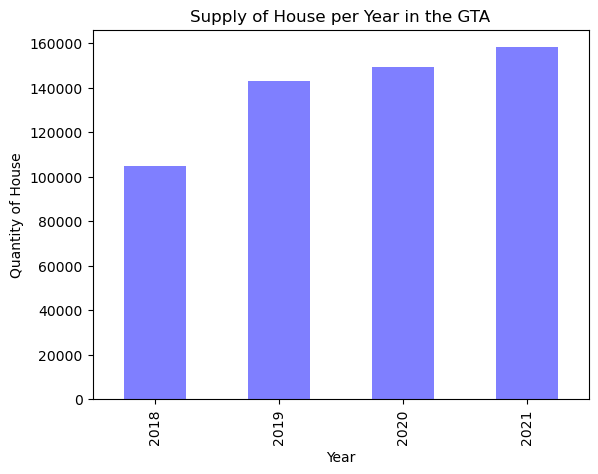

In [39]:
#Create bar to show increase in supply each year

bar = sum_column.plot(kind="bar", color ='b', alpha = 0.5, title="Supply of House per Year in the GTA", width = 0.5, legend=False)
bar.set_ylabel("Quantity of House")
bar.set_xlabel("Year")

# Save the figure
plt.savefig("Graphs/Supply_per_year.png")

plt.show()

# Comparison between supply and demand

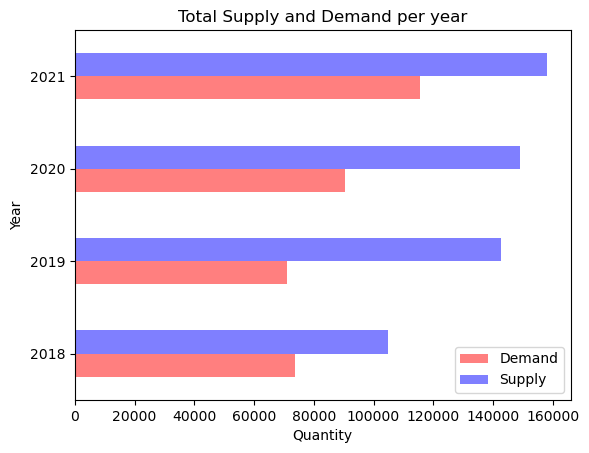

In [40]:
#Generate horizontal bar graph to show the difference in quanity between supply and demand for each year

Excess_supply = pd.DataFrame({'Demand':sum_column_demand, 'Supply': sum_column})
Excess_supply.plot.barh(color =(["r","b"]), alpha=0.5)
plt.title('Total Supply and Demand per year')
plt.ylabel("Year")
plt.xlabel("Quantity")

# Save the figure
plt.savefig("Graphs/Total_Supply_Demand.png")

plt.show()

In [42]:
#Finding max and min for 2021 demand, supply, and average house price 
demand_max_min = np.arange(df['Sales 2021'].min(), df['Sales 2021'].max(), 3)
supply_max_min = np.arange(df['New Listing 2021'].min(), df['New Listing 2021'].max(), 3)
price_max_min = np.arange(df['Average Price 2021'].min(), df['Average Price 2021'].max(), 3)

print(demand_max_min)
print(supply_max_min)
print(price_max_min)

[  657   660   663 ... 23163 23166 23169]
[  812   815   818 ... 33173 33176 33179]
[ 506788  506791  506794 ... 1717474 1717477 1717480]


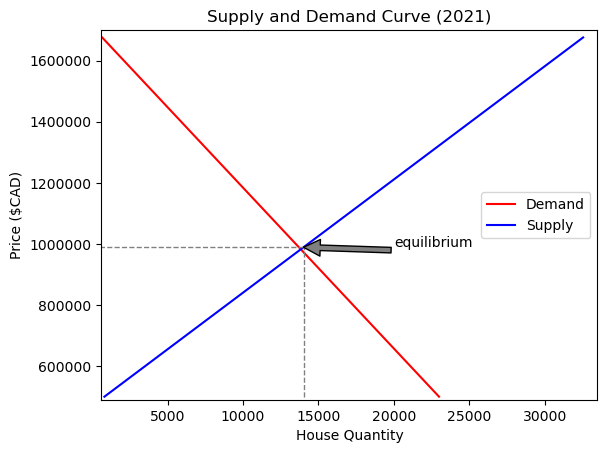

In [43]:
#Generate Supply and Demand curve for 2021

#used max and min +/- 100 to generate numbers between the intervals
demand = np.flip(np.arange(650, 23200, 456))
price  =np.arange(500000,1700000, 24000)
supply = np.arange(800, 33200, 648)

plt.plot(demand, price, 'red', label="Demand")
plt.plot(supply, price, 'blue', label="Supply")
plt.legend(loc=7)

plt.title("Supply and Demand Curve (2021)")
plt.xlabel('House Quantity')
plt.ylabel('Price ($CAD)')

plt.ylim(490000, 1700000)
plt.xlim(600,33500)
plt.ticklabel_format(style='plain')


plt.hlines(y=989171,xmin=0 ,xmax=14007,ls='--',lw=1,color='grey')
plt.vlines(x=14007, ymin=500000,ymax=989171,ls='--',lw=1,color='grey')


plt.annotate('equilibrium', xy=(14007, 989171), xytext=(20000, 989190), arrowprops=dict(facecolor='grey'))

plt.savefig("Graphs/Supply_Demand_Curve.png")
plt.show()

In [44]:
#Function finds intersection of both supply and demand curve 

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

print (line_intersection(([650, 1700000], [23200,500000]), ([800,500000], [33200,1700000])))

(14007.64331210191, 989171.974522293)
